In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [2]:
# Function to read TSV file and extract data
def read_tsv(file_path):
    with open(file_path, 'r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file, delimiter='\t')
        data = list(reader)
    return data

In [3]:
# Function to plot scatterplot with line of best fit
def plot_scatterplot_with_line(x_values, y_values, x_label, y_label, weights):
    plt.scatter(x_values, y_values, alpha=0.5)
    plt.title(f'Scatterplot of {x_label} vs Clarity with Line of Best Fit')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Plot the line of best fit
    plt.plot(x_values, [weights[0] + weights[1]*x for x in x_values], color='red', linewidth=2)

    plt.show()

In [6]:
# File paths
features_file_path = 'features-train.tsv'
clarity_scores_file_path = 'clarity-scores-train.tsv'

# Read data
features_data = read_tsv(features_file_path)
clarity_scores_data = read_tsv(clarity_scores_file_path)

In [7]:
# print the first 5 rows of the data
print(features_data[:5])
print(clarity_scores_data[:5])

[{'#id': '1191878965', 'chars_count': '448', 'words_count': '98', 'sents_count': '7', 'unique_words_count': '39', 'lexical_diversity': '0.8478260869565217', 'avg_word_len': '5.130434782608695', 'avg_sent_len': '6.571428571428571', 'punct_count': '13', 'punct_word_ratio': '0.1326530612244898', 'punct_sent_ratio': '1.8571428571428568', 'uppercase_char_count': '0', 'uppercase_char_ratio': '0.0', 'uppercase_word_count': '0', 'uppercase_word_ratio': '0.0', 'conjunction_count': '4', 'conjunction_word_ratio': '0.0408163265306122', 'adverb_count': '8', 'adverb_word_ratio': '0.0816326530612244', 'pronoun_count': '12', 'pronoun_word_ratio': '0.1224489795918367', 'misspelled_count': '2', 'misspelled_word_ratio': '0.0204081632653061', 'exclamation_count': '0', 'question_count': '1', 'sentiment_score': '-0.9405', 'conclusion_reasons_jaccard_sim': '0.0422535211267605', 'conclusion_reasons_char_count_ratio': '0.0334821428571428', 'conclusion_reason_word_count_ratio': '0.0408163265306122'}, {'#id': '1

#### (b) Implement the LMS algorithm and use it to compute the weight vector (w0,w1) and add the line of best fit to your plot from (a).<a

In [8]:
# LMS algorithm implementation
def lms_algorithm(x_values, y_values, learning_rate, epochs):
    # Initialize weights
    w0, w1 = 0, 0

    # Perform gradient descent
    for epoch in range(epochs):
        for x, y in zip(x_values, y_values):
            # Update weights
            prediction = w0 + w1 * x
            error = y - prediction
            w0 = w0 + learning_rate * error
            w1 = w1 + learning_rate * error * x

    return w0, w1

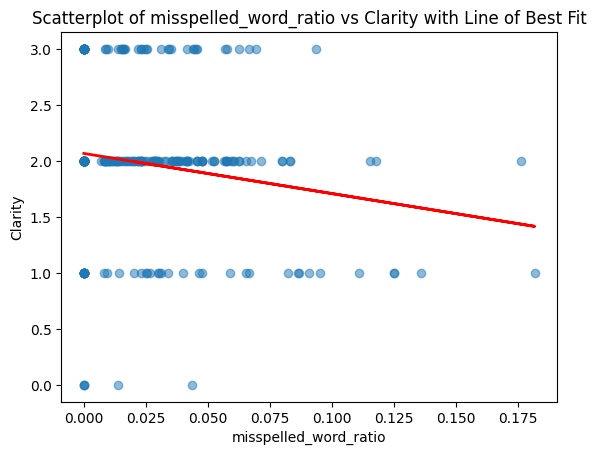

Computed weights (w0, w1): (2.0654825317368593, -3.5812042199127676)


In [9]:
# Extract selected feature (misspelled_word_ratio in this case) and clarity scores
selected_feature = 'misspelled_word_ratio'
x_values = [float(example[selected_feature]) for example in features_data]
y_values = [float(example['clarity']) for example in clarity_scores_data]

    # LMS parameters
learning_rate = 0.01
epochs = 1000

    # Apply LMS algorithm to compute weights
weights = lms_algorithm(x_values, y_values, learning_rate, epochs)

    # Plot scatterplot with line of best fit
plot_scatterplot_with_line(x_values, y_values, selected_feature, 'Clarity', weights)

print("Computed weights (w0, w1):", weights)

#### Compute the residula sum of squares (RSS) for the weight vector from (b)

In [10]:
# Function to compute Residual Sum of Squares (RSS)
def compute_rss(x_values, y_values, weights):
    rss = sum([(y - (weights[0] + weights[1] * x))**2 for x, y in zip(x_values, y_values)])
    return rss

# Compute RSS for the weight vector obtained from LMS
rss = compute_rss(x_values, y_values, weights)

print("Residual Sum of Squares (RSS):", rss)

Residual Sum of Squares (RSS): 111.12625222420662


#### (d) Use the weight vector from (b) to classify each example in the test set for clarity (C = {1, 2, 3}). Write the predicted classes to a clarity-scores-test.tsv in the same format as the clarity-scores-train.tsv. Submit the clarity-scores-test.tsv.

In [11]:
# print weights
print("Computed weights (w0, w1):", weights)

Computed weights (w0, w1): (2.0654825317368593, -3.5812042199127676)


In [12]:
# Function to write TSV file
def write_tsv(file_path, data, header):
    with open(file_path, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=header, delimiter='\t')
        writer.writeheader()
        writer.writerows(data)

In [13]:
# File paths
features_test_file_path = 'features-test.tsv'
clarity_scores_test_output_file_path = 'clarity-scores-test.tsv'

    # Read test data
features_test_data = read_tsv(features_test_file_path)

In [14]:
# Use the weight vector to predict clarity scores for test examples
predicted_clarity_scores = [weights[0] + weights[1] * float(example[selected_feature]) for example in features_test_data]

    # Round the predicted clarity scores to the nearest integer (assuming clarity scores are integers)
predicted_clarity_scores = [round(score) for score in predicted_clarity_scores]

    # Create data for clarity-scores-test.tsv
clarity_scores_test_data = [{'clarity': str(score)} for score in predicted_clarity_scores]

    # Write the predicted clarity scores to clarity-scores-test.tsv
write_tsv(clarity_scores_test_output_file_path, clarity_scores_test_data, ['clarity'])

print("Predicted clarity scores written to clarity-scores-test.tsv.")

Predicted clarity scores written to clarity-scores-test.tsv.
